In [1]:
# Importando as bibliotecas
import pandas as pd
from sklearn import tree;
from sklearn.model_selection import train_test_split

In [2]:
covidData = pd.read_excel("../database/dados-preprocessados-novos-organizados.xlsx")
covidData.head()
#covidData.shape

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,UTI,SUPORT_VEN,EVOLUCAO,QNT_SEMANAS
0,0,4,4,2,1,1,1,1,1,1,...,2,2,2,2,2,2,1,2,1,4
1,1,5,4,2,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,1,1
2,1,4,4,2,1,1,2,1,1,1,...,2,2,2,2,2,2,2,1,2,1
3,1,4,4,2,1,1,2,1,1,1,...,1,2,2,2,2,2,1,1,2,2
4,1,5,4,2,1,1,2,1,1,1,...,2,2,2,2,2,2,2,2,1,1


In [3]:
# Trocando os valores de evolução 1  -> 0 (curado); 2 -> 1 (óbito)

evolucao_valores = {1:0, 2:1}
covidData['EVOLUCAO'] = covidData['EVOLUCAO'].map(evolucao_valores)

In [4]:
#Filtrando os atributos 
# ["NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "QNT_SEMANAS", "DISPNEIA", "DESC_RESP", 
#                "FATOR_RISC", "SURTO_SG", "CARDIOPATI", "DIABETES", "PNEUMOPATI",
#                "SATURACAO", "DIARREIA", "VOMITO", "OBESIDADE", "UTI", "SUPORT_VEN", "EVOLUCAO"]
#'''
#attributes = ["NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "QNT_SEMANAS", "DISPNEIA", 
#                "FATOR_RISC", "SURTO_SG", "CARDIOPATI", "DIABETES", "PNEUMOPATI",
#                "SATURACAO", "DIARREIA", "VOMITO", "OBESIDADE", "UTI", "SUPORT_VEN", "EVOLUCAO"]

attributes = ["NU_IDADE_N", "CS_RACA", "FEBRE", "EVOLUCAO"]

covidData = covidData[attributes]
covidData.head()
#'''

,NU_IDADE_N,CS_RACA,FEBRE,EVOLUCAO
0,4,4,1,0
1,5,4,1,0
2,4,4,1,1
3,4,4,1,1
4,5,4,1,0


In [5]:
# nome da variável -> covidTrain (se usar o dummies) - covidData (se não usar)
# declaração do x -> principalDf (com PCA) - covidData.drop('EVOLUCAO',axis=1) (sem pca)
x_train, x_test, y_train, y_test = train_test_split(covidData.drop('EVOLUCAO',axis=1),
                                                    covidData['EVOLUCAO'],
                                                    test_size=0.3,
                                                    random_state=42);

In [53]:
#attributes = ["NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "QNT_DIAS", "DISPNEIA", "DESC_RESP", "FATOR_RISC", 
#               "SATURACAO", "DIARREIA","VOMITO", "OBESIDADE", "UTI", "SUPORT_VEN", "EVOLUCAO"]
#covidData.drop(columns=['FATOR_RISC'], inplace = True)
#covidData.head()

# Aplicando o Modelo Random Forest

In [6]:
# Random Forest n_estimators=30,
# min_samples_split = 2 ou 15-(Melhora um pouco)
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=1986, n_estimators=63, criterion='entropy', max_features = 'auto',
                                       max_depth = 10, n_jobs=-1, min_samples_split = 2)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=63, n_jobs=-1,
                       oob_score=False, random_state=1986, verbose=0,
                       warm_start=False)

In [7]:
# Random Forest - Predição
resultRF = classifier_rf.predict(x_test)

In [8]:
# Verificando a Acurácia
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, resultRF))

0.5836909871244635


In [9]:
# Verificando Métricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultRF))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72       146
           1       0.33      0.11      0.17        87

    accuracy                           0.58       233
   macro avg       0.48      0.49      0.45       233
weighted avg       0.51      0.58      0.52       233



In [14]:
# Importância das Métricas
'''
from sklearn.ensemble import RandomForestClassifier
feature_importances = pd.DataFrame(classifier_rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances
'''

"\nfrom sklearn.ensemble import RandomForestClassifier\nfeature_importances = pd.DataFrame(classifier_rf.feature_importances_,\n                                   index = x_train.columns,\n                                    columns=['importance']).sort_values('importance', ascending=False)\nfeature_importances\n"

# Salvando o Modelo Desenvolvido

In [11]:
#Biblioteca que transforma variáveis em documentos
import pickle

#cria o documento 'model.pickle' em modo de WB (write binary)
with open("model.pickle","wb") as f: 
  pickle.dump(classifier_rf, f)
  

## carregando o modelo para o código
with open("model.pickle","rb") as f: #Carrega o arquivo model.pickle em modo read binary
  modelo_carregado = pickle.load(f)

# Verificando as métricas

In [4]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [12]:
y = covidData["EVOLUCAO"]
x = covidData.drop(columns=['EVOLUCAO'], inplace = False)
melhores_dados = SelectKBest(chi2, k=10).fit_transform(x, y)

In [6]:
melhores_dados.shape

(774, 10)

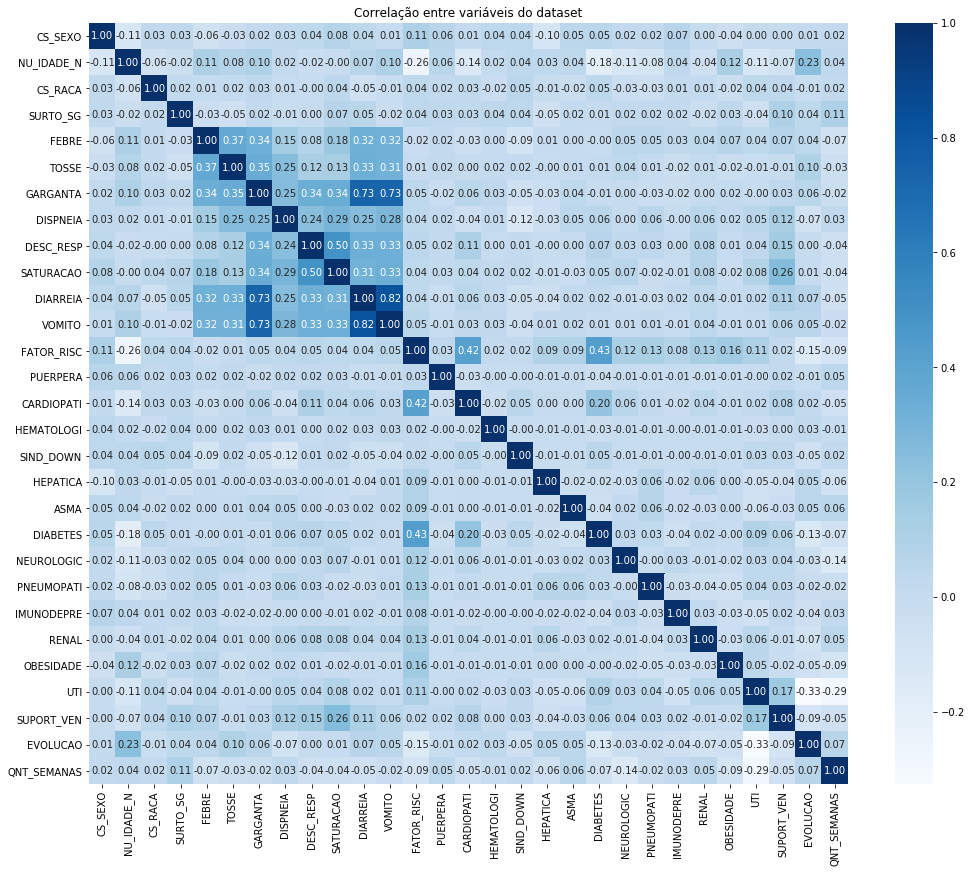

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(17, 14))
sns.heatmap(covidData.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()